In [41]:
from hsic import *
import numpy as np
from matplotlib import pyplot as plt
import torch
import dcor

In [13]:
mat1 = np.random.normal(0,1,size =(1000,1))
mat2 = np.random.normal(0,1,size = (1000,1))

In [16]:
HSIC(torch.tensor(mat2),torch.tensor(mat2))

0.09368952174972013

In [4]:
mat1.shape

(1000, 1)

In [17]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]

In [75]:
def gaussian_data(sigma,dim):
    mean = np.zeros((dim,))
    cov = np.identity(dim)
    cov[1,0] = sigma
    cov[0,1] = sigma
    data = np.random.multivariate_normal(mean, cov, size=1000)
    return data

In [85]:
hsic_dict={}
for j in np.arange(4,20,2):
    hsic_array = []
    for i in np.arange(0,1,0.1):
        data = gaussian_data(i,j)
        hsic = HSIC(torch.tensor(data[:,0].reshape(-1,1)),torch.tensor(data[:,1:]))
        hsic_array.append(hsic)
    hsic_dict[str(j)] = hsic_array

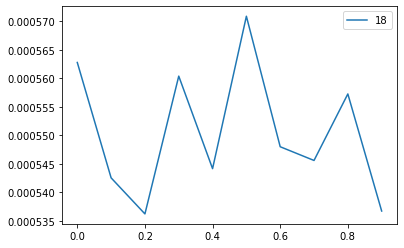

In [95]:
plt.plot(np.arange(0,1,0.1),hsic_dict['18'],label=key)
#plt.ylim(0,0.002)
plt.legend()
plt.show()

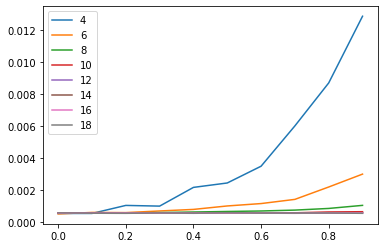

In [88]:
for key in list(hsic_dict.keys()):
    plt.plot(np.arange(0,1,0.1),hsic_dict[key],label=key)
#plt.ylim(0,0.002)
plt.legend()
plt.show()

In [96]:
dcor_dict = {}

for j in np.arange(4,50,2):
    dcor_array = []
    for i in np.arange(0,1,0.1):
        data = gaussian_data(i,j)
        dcor_ = dcor.distance_correlation_af_inv(data[:,0],data[:,1:])
        dcor_array.append(dcor_)
    dcor_dict[str(j)] = dcor_array

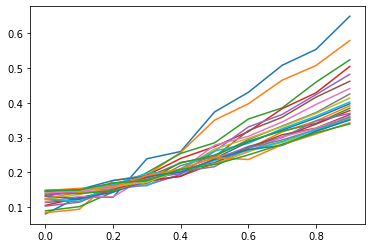

In [97]:
for key in list(dcor_dict.keys()):
    plt.plot(np.arange(0,1,0.1),dcor_dict[key],label=key)
#plt.legend()
plt.show()